# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

[Another clearer derivation](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf)

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

[Another clearer derivation](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf)

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^Nx_i - \hat{\beta}_1\sum_{i=1}^N x_i^2 \right]\\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

[Another clearer derivation](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf)

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [93]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [94]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [95]:
boston.data.shape

(506, 13)

In [96]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [97]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [98]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [99]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [100]:
print(boston.target.shape)

(506,)


In [101]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  


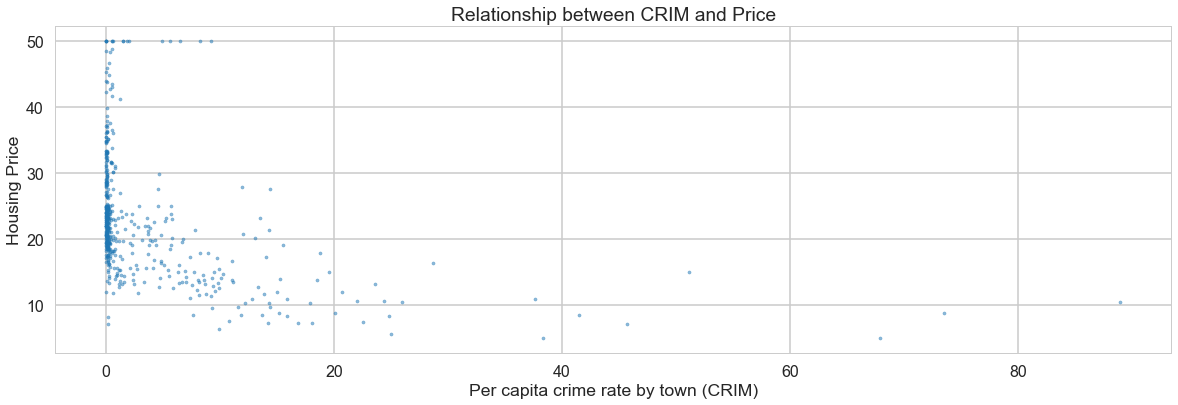

In [12]:
plt.rcParams["figure.figsize"] = (20,6)
plt.scatter(bos.CRIM, bos.PRICE, alpha=0.5, s=10)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

# Your turn: describe relationship
There is a strong negative correlation between the crime rate by town and the house price among the cheapest houses (those under 20K). The relationship is not linear and has outliers - with some cheep houses in low crime areas (perhaps they are small). The relationship is also not strongly relevant for houses above 30k, where almost all houses are in very low crime areas. There are some outliers at this end of the data also where houses greater than 50K are shown as in neighborhoods with some crime.

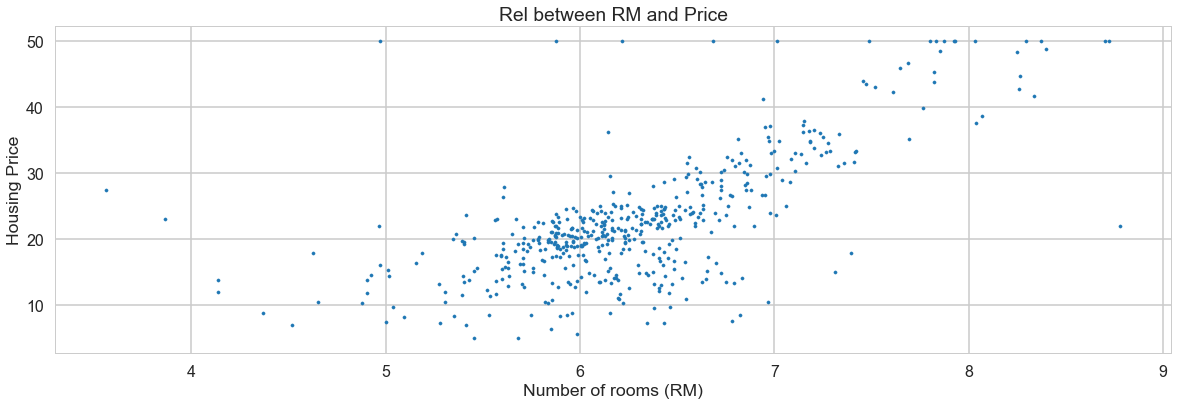

In [13]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE, s=10)
plt.xlabel("Number of rooms (RM)")
plt.ylabel("Housing Price")
plt.title("Rel between RM and Price")
plt.show()

Number of rooms is strongly positively correlated to house price, with more rooms associated with higher house prices. There are a few outliers to this relationship where you have a few small homes with high prices, and a few large homes cheaper than you might otherwise expect. 

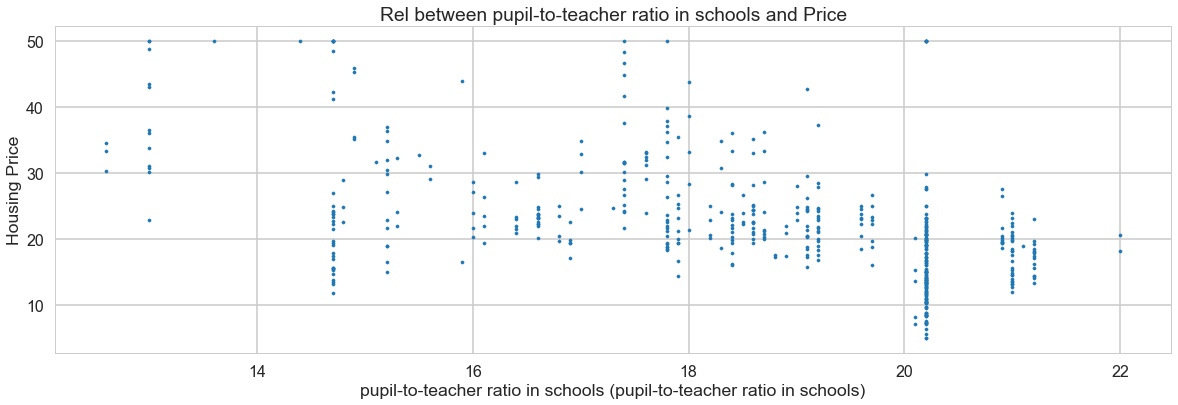

In [14]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE, s=10)
plt.xlabel("pupil-to-teacher ratio in schools (pupil-to-teacher ratio in schools)")
plt.ylabel("Housing Price")
plt.title("Rel between pupil-to-teacher ratio in schools and Price")
plt.show()

There doesn't seem to be a strong obvious trend in the pupil-to-teacher ratio compared to house prices although a mild association between small pupil-to-teacher ratios and high house prices is visible.

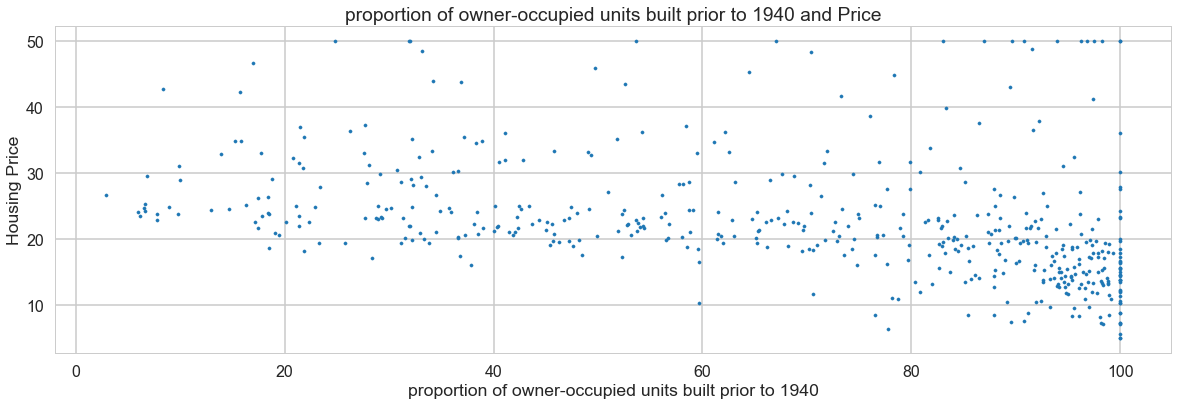

In [15]:
# your turn: create some other scatter plots
plt.scatter(bos.AGE, bos.PRICE, s=10)
plt.xlabel("proportion of owner-occupied units built prior to 1940")
plt.ylabel("Housing Price")
plt.title("proportion of owner-occupied units built prior to 1940 and Price")
plt.show()

As you would expect there is a negative trend the older the houses the lower their price although there are significant outliers at many price points.

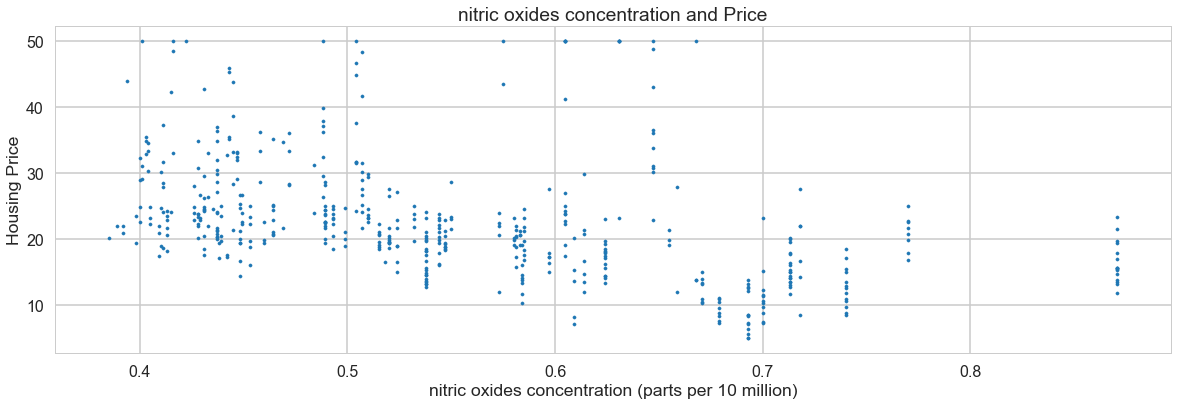

In [16]:
# your turn: create some other scatter plots
plt.scatter(bos.NOX, bos.PRICE, s=10)
plt.xlabel("nitric oxides concentration (parts per 10 million)")
plt.ylabel("Housing Price")
plt.title("nitric oxides concentration and Price")
plt.show()

There seems to be a negative correlation where high Nitric oxides concentration is related to lower house prices.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

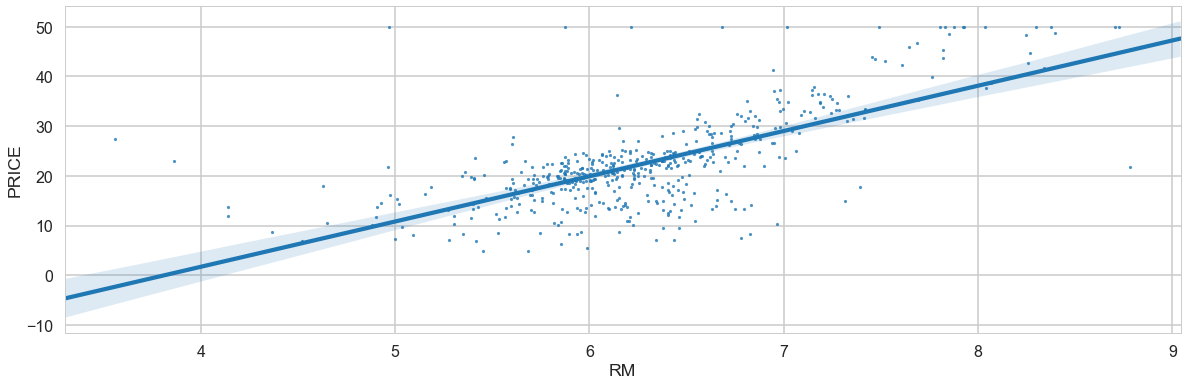

In [17]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True, scatter_kws={'s':10})

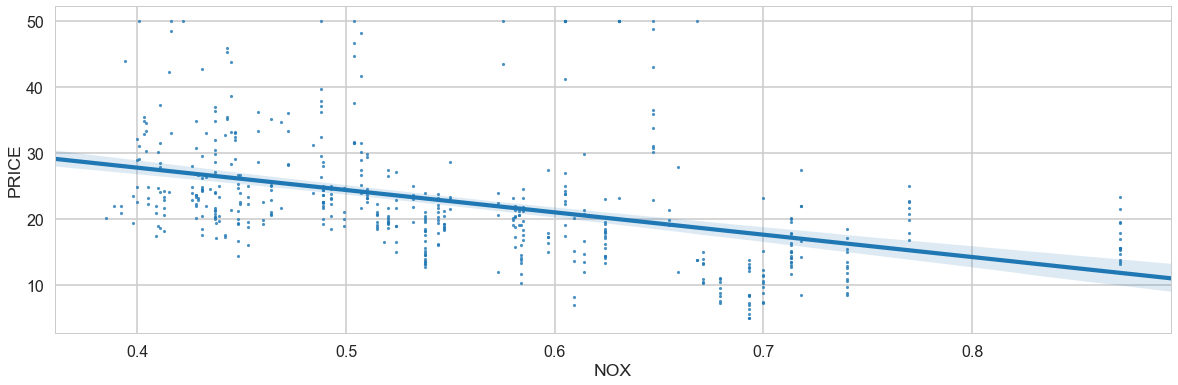

In [18]:
sns.regplot(y="PRICE", x="NOX", data=bos, fit_reg = True, scatter_kws={'s':10})

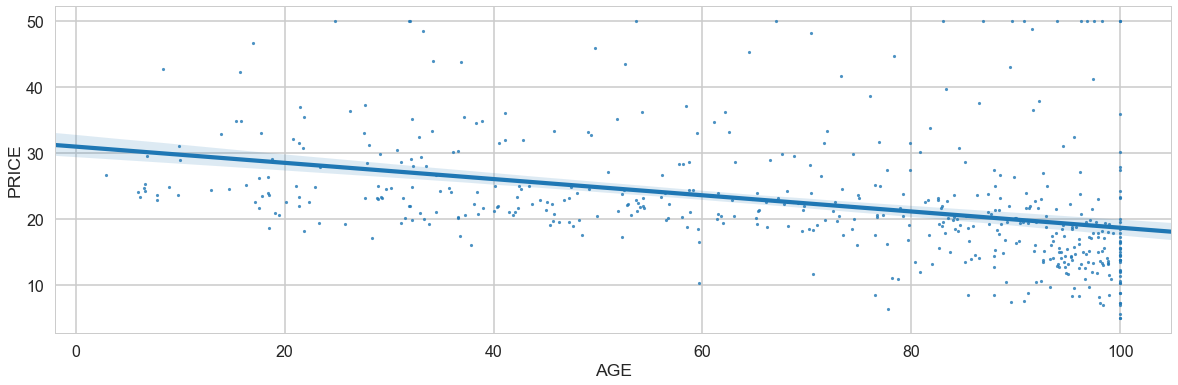

In [19]:
sns.regplot(y="PRICE", x="AGE", data=bos, fit_reg = True, scatter_kws={'s':10})

### Histograms
***


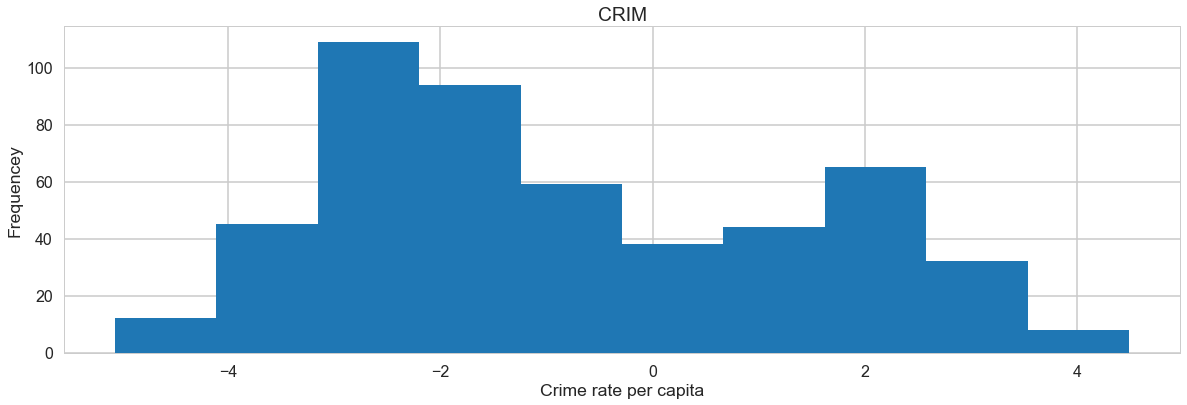

In [20]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

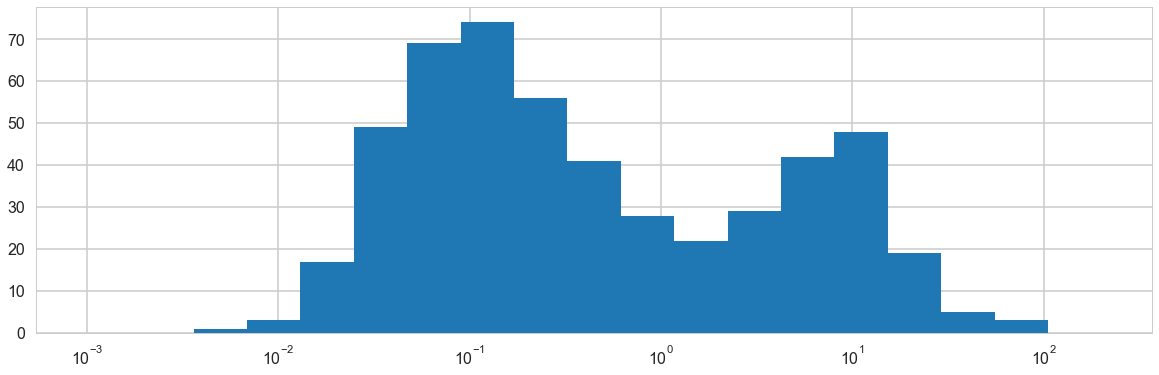

In [21]:
# much better code as the manipulation doesn't obsure the data value
plt.figure()
plt.hist(bos.CRIM, bins = 10 ** np.linspace(np.log10(0.001), np.log10(200.0), 20))
plt.gca().set_xscale("log")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

### A R based clear analysis of what we're going through
[R Pubs Boston Housing](http://www.rpubs.com/brousseauj/242422)

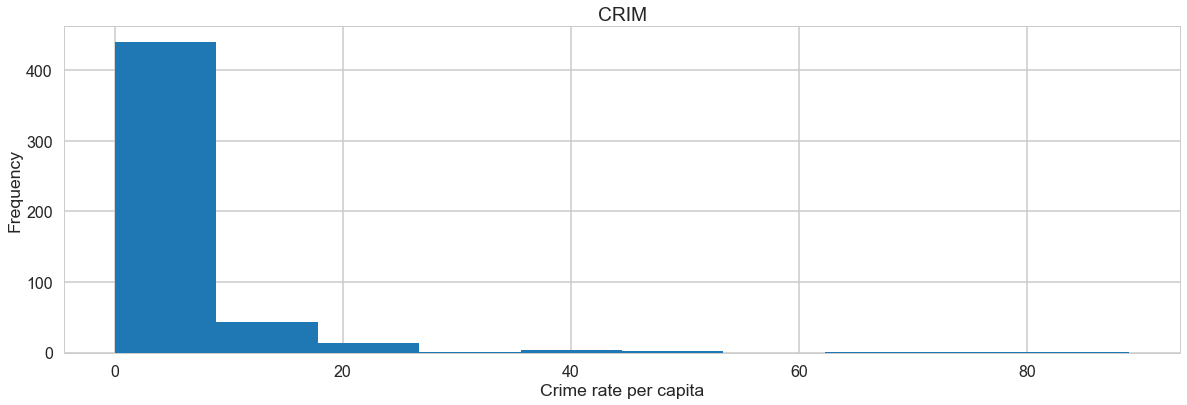

In [22]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

Taking the log of the CRIM spreads the data out more evenly over the axis range putting a more even number of points in each range of the axis. This allows the double peak of the CRIM data to become visible which could not be easily seen before.

In [23]:
def replaceZeroes(data, zero_replacement):
    min_nonzero = np.min([data[x] for x in np.nonzero(data)])
    data[data == 0] = zero_replacement
    return data

def log_no_log_hist(var, zero_replacement):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,3))
    ax1.hist(bos[var], bins=20)
    ax1.set_title("No log {}".format(var))
    ax1.set_xlabel(var)
    ax1.set_ylabel("Frequency")
    
    data = replaceZeroes(bos[var].copy(), zero_replacement)
    vmin, vmax = data.min(), data.max()
    bins = 10 ** np.linspace(np.log10(vmin), np.log10(vmax), 20)
    
    ax2.hist(data, bins = bins)
    ax2.set_xscale("log")
    ax2.set_title("Log {}".format(var))
    ax2.set_xlabel(var)
    ax2.set_ylabel("Frequency")
    plt.show()

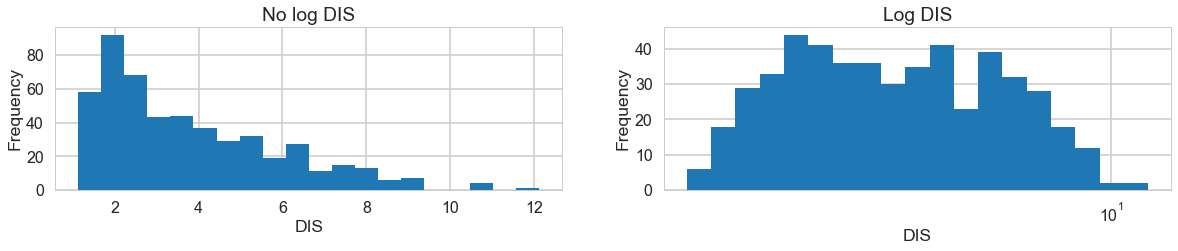

In [24]:
log_no_log_hist('DIS', 0.001)

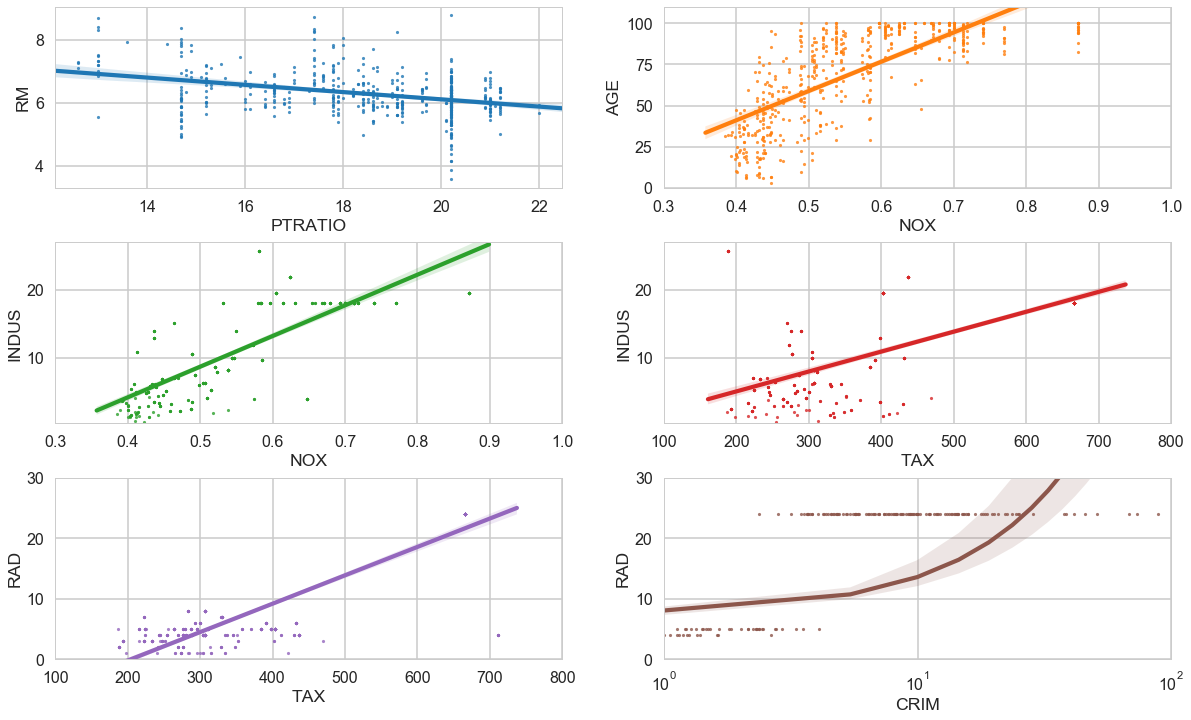

In [25]:
fig, axes = plt.subplots(3,2, figsize=(20,12))
fig.subplots_adjust(hspace=.3)
sns.regplot(y="RM", x="PTRATIO", data=bos, fit_reg = True, ax=axes[0,0], scatter_kws={'s':10})
ax=axes[0,1]
sns.regplot(y="AGE", x="NOX", data=bos, fit_reg = True, ax=ax, scatter_kws={'s':10})
ax.set_xlim([0.3, 1])
ax.set_ylim([0, 110])
ax=axes[1,0]
sns.regplot(y="INDUS", x="NOX", data=bos, fit_reg = True, ax=ax, scatter_kws={'s':10})
ax.set_xlim([0.3, 1])
ax.set_ylim([0.3, 27])
ax=axes[1,1]
sns.regplot(y="INDUS", x="TAX", data=bos, fit_reg = True, ax=ax, scatter_kws={'s':10})
ax.set_xlim([100, 800])
ax.set_ylim([0.3, 27])
ax=axes[2,0]
sns.regplot(y="RAD", x="TAX", data=bos, fit_reg = True, ax=ax, scatter_kws={'s':10})
ax.set_xlim([100, 800])
ax.set_ylim([0, 30])
ax=axes[2,1]
#ax.set(xscale="log", xlim=[0, 100], ylim=[0, 30])
sns.regplot(y="RAD", x="CRIM", data=bos, fit_reg = True, ax=ax, scatter_kws={'s':10})
ax.set_xscale('log')
ax.set_xlim([1, 100])
ax.set_ylim([0, 30])
plt.show()

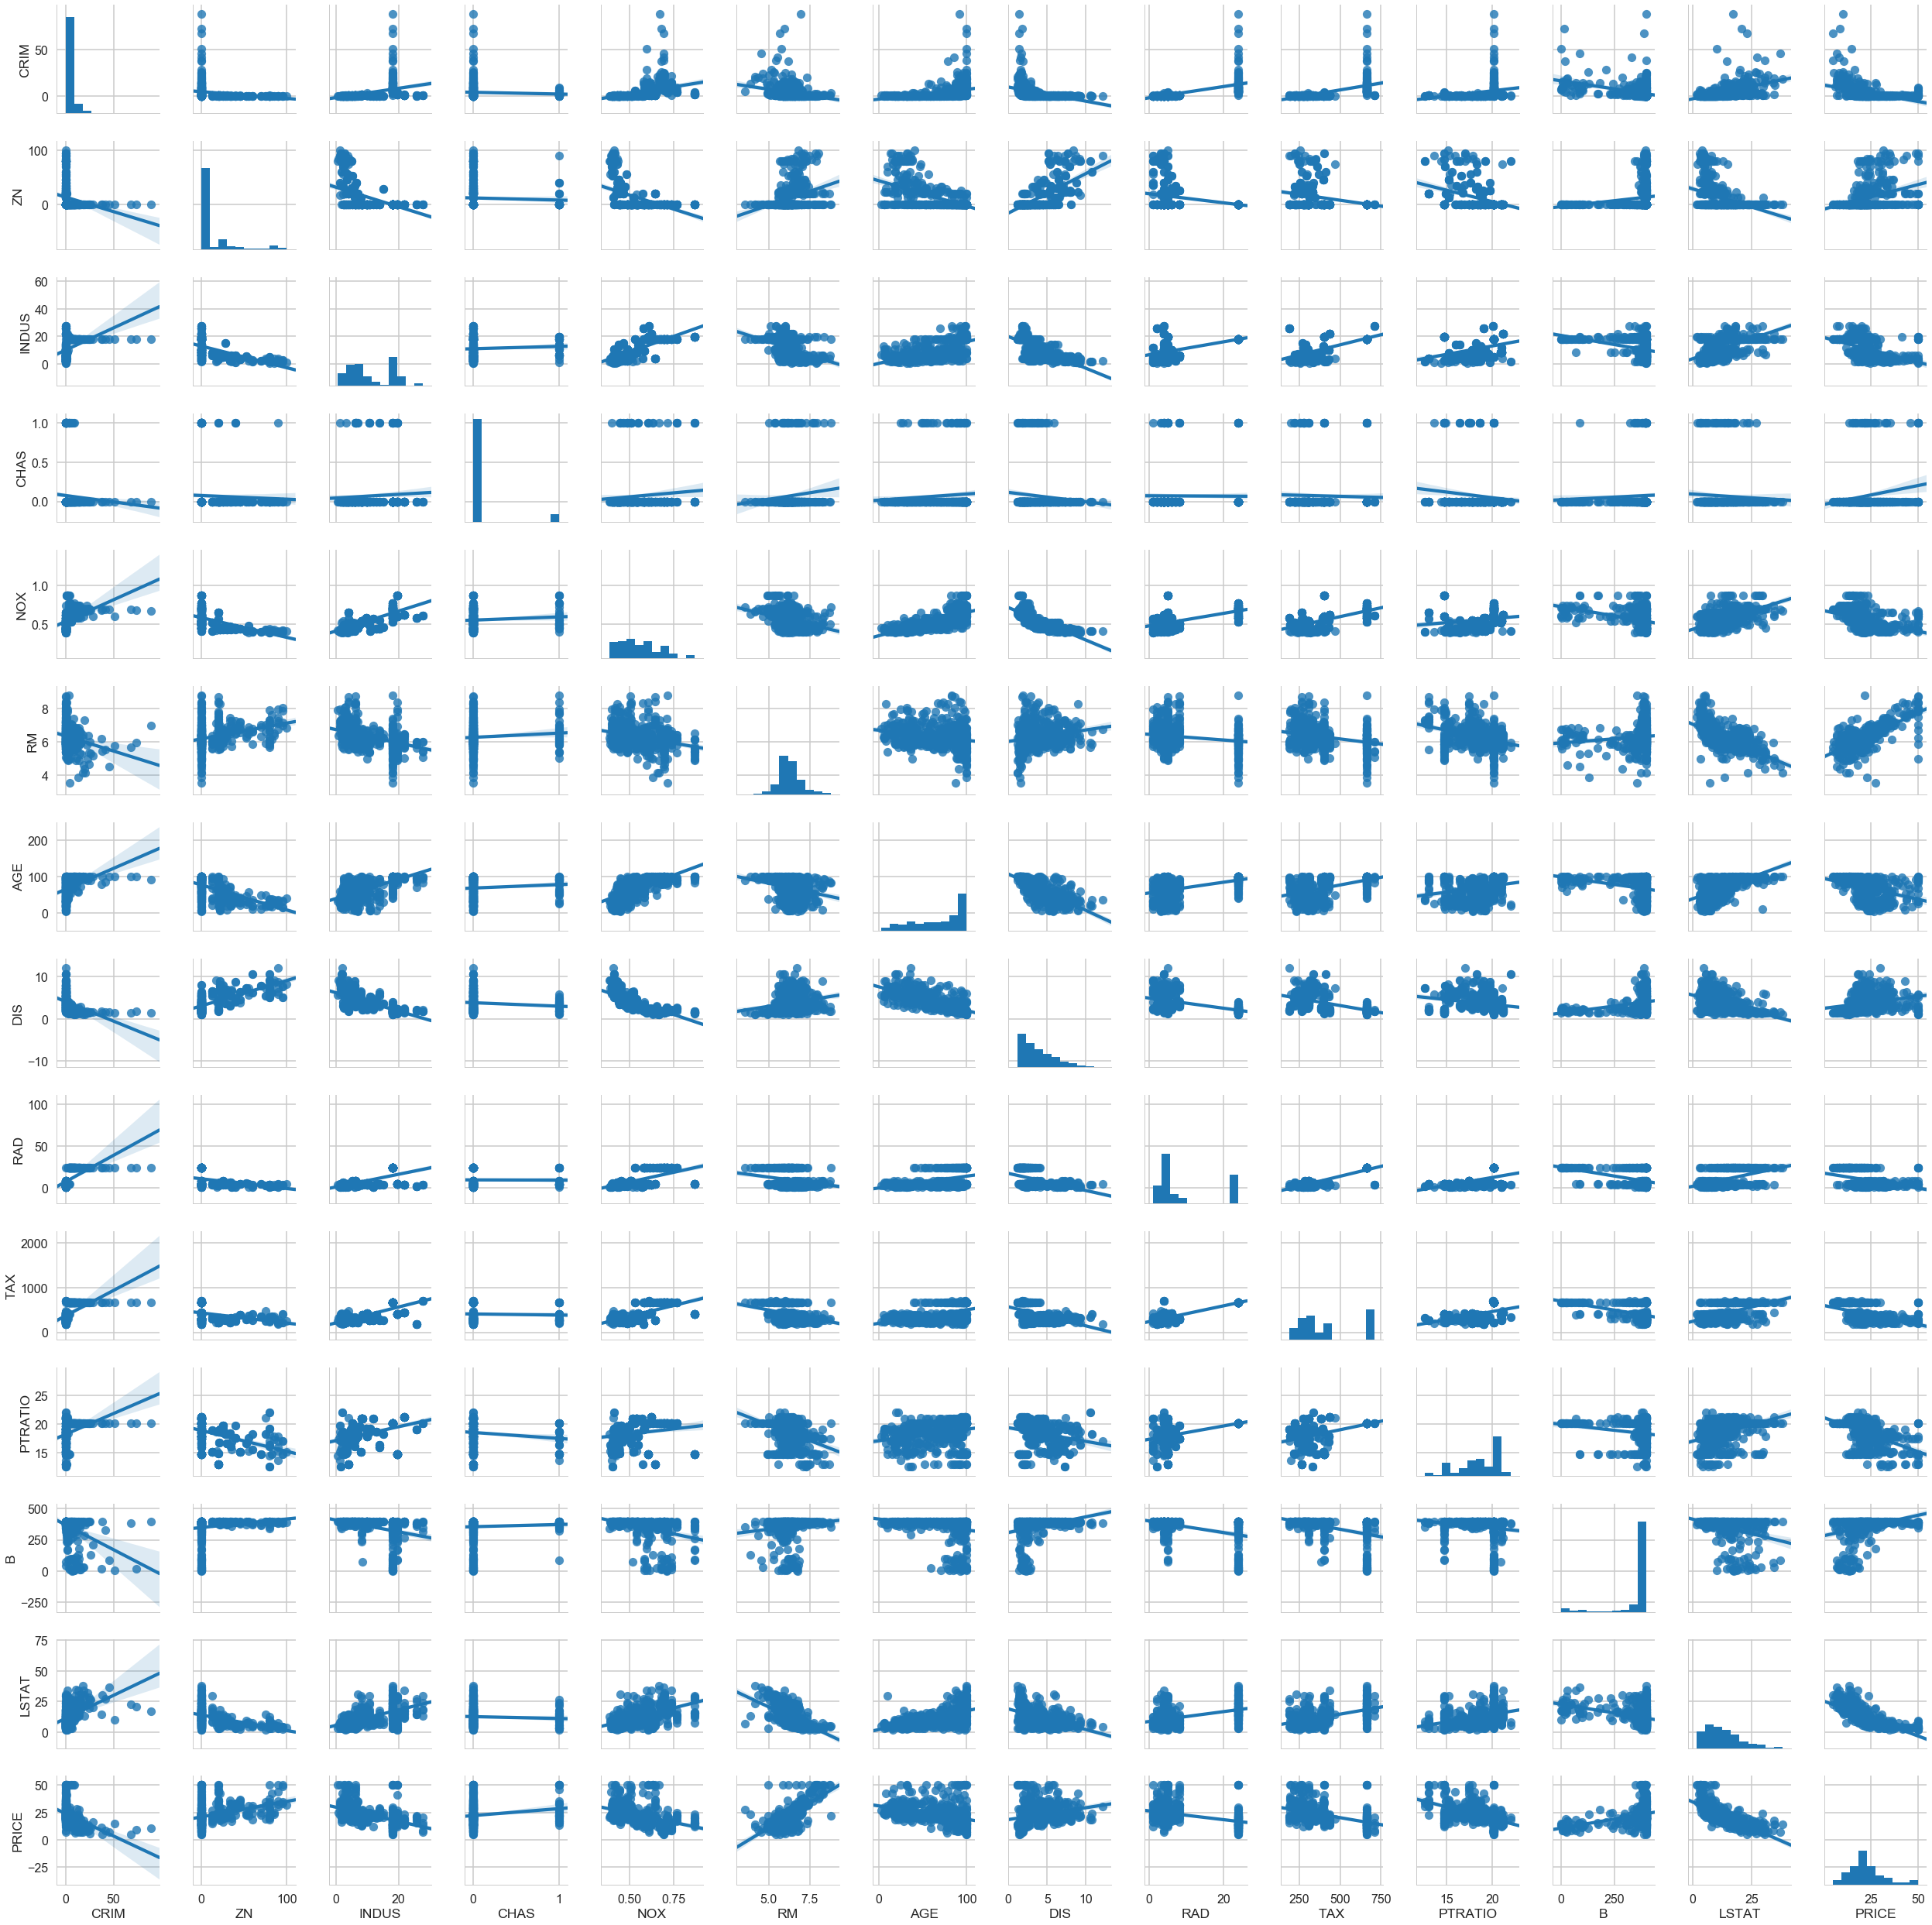

In [26]:
plt.rcParams["figure.figsize"] = (20,15)
sns.pairplot(bos, kind='reg')
plt.show()

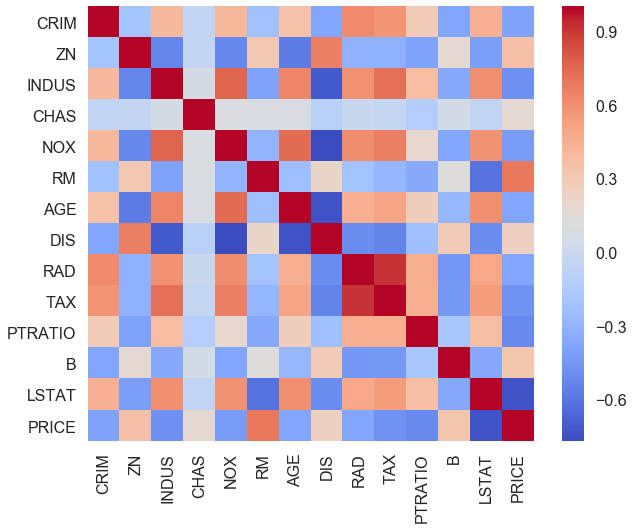

In [27]:
plt.rcParams["figure.figsize"] = (10,8)
corr = bos.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

In [28]:
#cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
#cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7)
cmap = 'coolwarm'

def magnify():
    return [dict(selector="th", props=[("font-size", "7pt")]),
            dict(selector="td", props=[('padding', "0em 0em")]),
            dict(selector="th:hover", props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover", 
                 props=[('max-width', '200px'), ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1,-0.2,0.4,-0.055,0.42,-0.22,0.35,-0.38,0.62,0.58,0.29,-0.38,0.45,-0.39
ZN,-0.2,1,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.4,-0.53,1,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.055,-0.043,0.063,1,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.62,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [29]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [30]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 30 Aug 2018   Prob (F-statistic):           2.49e-74
Time:                        14:53:38   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is done like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

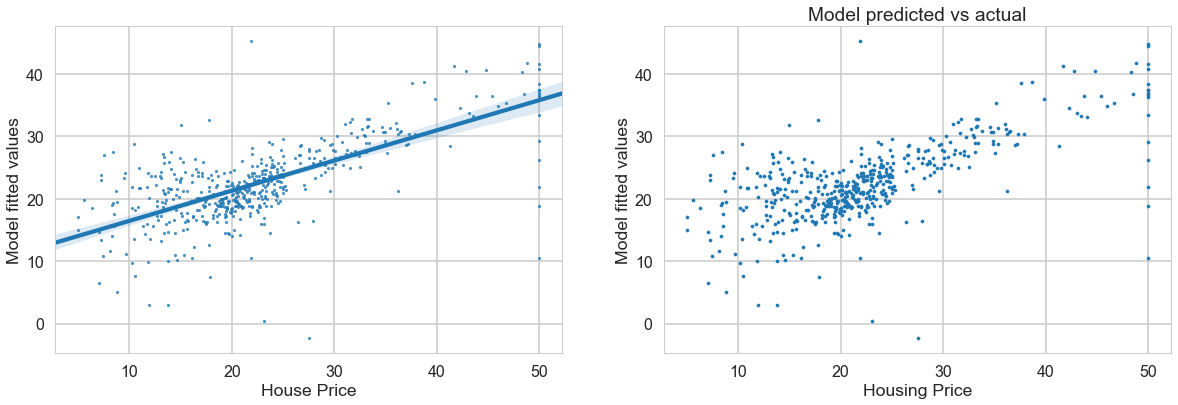

In [31]:
# your turn
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[20,6])
sns.regplot(x=bos.PRICE, y=m.fittedvalues, fit_reg = True, ax=ax1, marker='o', scatter_kws={'s':10})
ax1.set_ylabel("Model fitted values")
ax1.set_xlabel("House Price")
ax2.scatter(bos.PRICE, m.fittedvalues, s=10)
ax2.set_ylabel("Model fitted values")
ax2.set_xlabel("Housing Price")
ax2.set_title("Model predicted vs actual")
plt.show()

There are a number of very expensive homes that the model fails to fit well at all. Room count is only one factor that drives house price. Its also odd that we have a price limit of 50k. While the model max price predicted is just over 45k

It looks like one data point has a negative model fitted value - so perhaps there is a bad data point also.

In [32]:
print('Min predicted value: {}\nMax predicted value: {}'.format(
    np.min(m.fittedvalues),np.max(m.fittedvalues)))

Min predicted value: -2.2580106944555354
Max predicted value: 45.24589607832449


### Fitting Linear Regression using `sklearn`


In [104]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)
y = bos['PRICE'].values
#y = y.reshape(-1, 1)      # not actually needed and it causes an extra [] in the prediction results

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [34]:
# Look inside lm object
#lm.<tab>
#lm.get_params

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [35]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, y)

/Users/alisonkline/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
lm.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


### Part3: 
#### 1 To not fit an intercept term:
Instanciate the regressor with the `fit_intercept = False`

    lm = LinearRegression(fit_intercept = False)

most of the time you don't want to fit a linear regression model without an intercept as forcing the regression line through 0 when it doesn't actually got through 0 will introduce bias to all the other parameters. If you `know` your model should go through 0 theoretically then it can make sense to fit without an intercept

more [information in this CV answer](https://stats.stackexchange.com/questions/7948/when-is-it-ok-to-remove-the-intercept-in-a-linear-regression-model) and [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/)

#### 2 Residuals must be i.i.d. (independently and identically distributed) - is residuals being normally distributed enough?
No, if the residuals are normally distributed then the model passes that Assumption requirement but there are others.
[Reference](https://www.theanalysisfactor.com/assumptions-about-residuals/)
 1. Relationship between the outcomes and the predictors is linear.
 2. Error term has mean almost equal to zero for each value of outcome. (ie sum of $\epsilon = 0$)
 3. Error term has constant variance.
 4. Errors are uncorrelated.
 5. Errors are normally distributed or we have an adequate sample size to rely on large sample theory.
 
#### 3 To use Linear regression Y  must be normally distributed True or False
False the unobservable errors or residuals need to be normally distributed but because the model estimate is a function of Y & X then if the un-observed errors are normally distributed then Y maybe or may not be.
$$Y = E(X|Y) + \epsilon$$

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [37]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.49110328036187


In [38]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [39]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [40]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

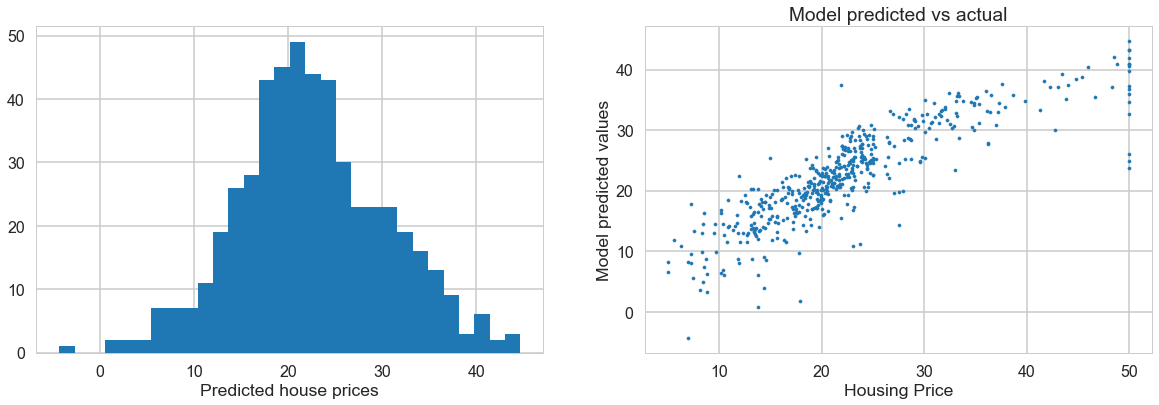

In [41]:
# your turn
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[20,6])
ax1.hist(lm.predict(X), bins=30)
ax1.set_xlabel("Predicted house prices")
ax2.scatter(bos.PRICE, lm.predict(X), s=10)
ax2.set_ylabel("Model predicted values")
ax2.set_xlabel("Housing Price")
ax2.set_title("Model predicted vs actual")
plt.show()

In [42]:
#preds = [x[0] for x in lm.predict(X)]    # needed if you reshape y
pd.DataFrame({'prediction':lm.predict(X)}).describe()

,prediction
count,506.000000
mean,22.532806
std,7.914896
min,-4.283009
25%,17.447270
50%,22.120625
75%,27.412587
max,44.673399


The house prices predicted by our linear regression model are approximately normally distributed around a mean of \$22.5k, and a standard deviation of \$7.9k. There do appear to be outliers, particularly the house predicted to have a price of less than 0 or the \$50k houses with low predicted price. These houses could be second homes, or particularly large, small or have custom or unusual features that impact their value. These should be removed as linear regressions are sensitive to such.

Advantages and disadvantages of [`statsmodels`](https://github.com/statsmodels/statsmodels) and [`scikit-learn`](https://github.com/scikit-learn/scikit-learn)

`statsmodels` allows easy configuration of exact and complex models for example to allow individual predictors to be explored separately. It also mirrors the input of 'R' so people familiar with that statistics language will have less of a learning curve.

`scikit-learn` although both packages have been being developed for about the same length of time `scikit-learn` is somewhat more widely used and developed having 10x more contributors more than 4 times as many releases and over twice as many commits. 

They have different strengths, `scikit-learn` is optimized for data-analysis, finding the right model and getting it well configured/fit to your data. Where as `statsmodels` is optimized for advanced statistics, econometrics and linear-models. There are more model options and configuration parameters. [reference](https://blog.thedataincubator.com/2017/11/scikit-learn-vs-statsmodels/)

`scikit-learn` doesn't have standard stats report summaries as its focus is assessing model accuracy on new previously unseen data (ie test/train ml techniques), `statsmodels` has the summary report print outs useful in more traditional model analysis. [ref](https://stackoverflow.com/questions/26319259/sci-kit-and-regression-summary)

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ error sum of squares = RSS = \sum_{i=1}^N r_i^2 =  \sum_{i=1}^N \left( y_i - \hat{y} \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [43]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149873


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$
possibly - lack of fit sum of squares $\sum_{i=1}^N \left( \bar{y} - \hat{y}_i \right)^2$

In [44]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))** 2))

31636.019130869747


#### Total Sum-of-Squares (aka $TSS$)

The total sum-of-squares error seen in the model.

$$pure error sum of square = TSS = \sum_{i=1}^N \left( y_i - \bar{y} \right)^2$$

In [45]:
print(np.sum((bos.PRICE - np.mean(bos.PRICE)) ** 2))

42716.29541501976


In [46]:
# TSS = ESS + RSS
31636.019130869747+11080.276284149873

42716.29541501962

### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

[further reading on degs of freedom](https://onlinecourses.science.psu.edu/stat501/node/269/)

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [47]:
# your turn
m1 = ols('PRICE ~ PTRATIO',bos).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 30 Aug 2018   Prob (F-statistic):           1.61e-34
Time:                        14:53:39   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

Using `statsmodels` to create and fit a single variable model of the 'PTRATIO' (pupil-teacher ratio by town) as the predictor of the house prices. Looking at the summary report you see that the `PTRATIO` has a coef of -2.1572 which indicates that for each point increase in house price will drop by 2.1572. There is also a constant or intercept of 62.3446 so a house in a town with a 0 pupit-teacher ratio will have a price for a house of \$62k.

In [48]:
print('The R-squared value is : {:.5}'.format(m1.rsquared))

The R-squared value is : 0.25785


The $R^2$ value of a regression analysis is the ratio between the variance in Y that is "explained" by the regression (or, equivalently, the variance in $ \hat{Y}$ , and the total variance in $Y$. It gives us an indication of how well the data fits the model. In this case it tells us that almost $26\%$ of the variation in house prices are explained by this linear model. When looked at in context of adding/removing specific variables to a model it can indicate how much of the prediction result is caused by this parameter.

In [49]:
print('The F-statistic value is : {:.5} with prob {:.5}'.format(m1.fvalue, m1.f_pvalue))

The F-statistic value is : 175.11 with prob 1.6095e-34


The F-statistic test the overall significance of the regression model, specifically testing if setting all co-efficients to 0 (ie having a flat intercept only model) gives a better 'fit' to the observed data. The value of 175.11 is much larger than the F-statistic so we can conclude that the model is giving a better fit that if there were no coefficients. The fact that the p-value for the f-statistic is so small indicates that this F-statistic result is very unlikely to have occurred by chance.

The t-statistic reported in a linear regression tests the hypothesis that coefficient i  is equal to zero - meaning the corresponding term is not significant. For simple regression models the t-statistic for the simple single predictive variable will be the square root of the F-statistic for the model.

[Interpretation reference](https://www.mathworks.com/help/stats/f-statistic-and-t-statistic.html)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [50]:
# your turn
m2 = ols('PRICE ~ PTRATIO + RM + CRIM',bos).fit()
#m2 = ols('PRICE ~ PTRATIO + RM + CRIM + INDUS + AGE',bos).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Thu, 30 Aug 2018   Prob (F-statistic):           1.09e-97
Time:                        14:53:39   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

In [51]:
print('The R-squared value is : {:.5}'.format(m2.rsquared))
print('The F-statistic value is : {:.5} with prob {:.5}'.format(m2.fvalue, m2.f_pvalue))

The R-squared value is : 0.59341
The F-statistic value is : 244.22 with prob 1.09e-97


The $R^2$ shows that this 3 predictor model explains $59\%$ of the variance of the observed data, it is extremely unlikely that we would have seen this result by chance so the model is statistically significant.

The F-statistic of 244 indicates that this model does a better job of predicting results than a 'flat' intercept model.

The t-statistics p values for all the model's predictors are very small indicating that all three of these variables are indeed statistically significant when trying to predict house prices. When adding in INDUS and AGE you see the p values for the t-stats indicate these are not good predicting features.

### Cross reference using sklearn
Note the model ends up the same but its MUCH harder than with statsmodels to extract and present a range of measures and make a quick model assessment.

In [52]:
#from sklearn.linear_model import LinearRegression
X2 = bos[['PTRATIO', 'RM', 'CRIM']].values
y2 = bos['PRICE'].values
#y = y.reshape(-1, 1)      # not actually needed and it causes an extra [] in the prediction results

# This creates a LinearRegression object
lm2 = LinearRegression()
lm2.fit(X2, y2)
lm2y_pred = lm2.predict(X2)

In [54]:
from sklearn.metrics import classification_report   # only good for classification models
from sklearn.metrics import confusion_matrix
# https://stackoverflow.com/a/26326883/1215012

print(lm2)
expected = y2
predicted = lm2y_pred

# summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print(lm2.intercept_, lm2.coef_, mse,)
print('R squared: {}'.format(lm2.score(X2, y2)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
-3.3066171324064584 [-1.0741868   7.3815667  -0.20210971] 34.3237965646812
R squared: 0.5934141551136978


## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

[great answer with two awesome links on model picking](https://stackoverflow.com/a/47156136/1215012)

In [55]:
m3 = ols('PRICE ~ PTRATIO + RM + CRIM + CHAS + NOX + DIS + LSTAT',bos).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     181.5
Date:                Thu, 30 Aug 2018   Prob (F-statistic):          1.16e-132
Time:                        14:54:18   Log-Likelihood:                -1519.6
No. Observations:                 506   AIC:                             3055.
Df Residuals:                     498   BIC:                             3089.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.2440      4.608      7.649      0.0

In [56]:
print('The R-squared value is : {:.5}'.format(m3.rsquared))
print('The F-statistic value is : {:.5} with prob {:.5}'.format(m3.fvalue, m3.f_pvalue))

print('Model 2 AIC: {:.5} \nModel 3 AIC: {:.5} a decrease of {:.0f} '.format(m3.aic, m2.aic, m2.aic-m3.aic))

The R-squared value is : 0.71844
The F-statistic value is : 181.53 with prob 1.1594e-132
Model 2 AIC: 3055.2 
Model 3 AIC: 3233.1 a decrease of 178 


Adding 4 more variables to the model as dropped the AIC over 170 points. The $R^2$ shows that this 7 predictor model explains $71\%$ of the variance of the observed data, it is extremely unlikely that we would have seen this result by chance so the model is statistically significant.

The F-statistic of 181 indicates that this model does a better job of predicting results than a 'flat' intercept only model.

The t-statistics p values for all the model's predictors are small indicating that all of these variables are indeed statistically significant when trying to predict house prices, (all though in this model the CRIM is marginally significant).


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-success">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important to investigate with linear regression models.

<div class="span5 alert alert-success">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

[great reference](https://data.library.virginia.edu/diagnostic-plots/)

In [102]:
# Your turn.
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())
#display(m.summary())    # prettier format in a table but the 3 tables don't line up

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 30 Aug 2018   Prob (F-statistic):           2.49e-74
Time:                        15:48:44   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

In [128]:
def residual_plots(m, X, y, x_1d):
    fig, axes = plt.subplots(2,2, figsize=[20,10])
    fig.subplots_adjust(hspace=.3)

    ax = axes[0,0]
    ax.scatter(y, x_1d, s=10, label='Actual prices')
    ax.scatter(m.predict(X), x_1d, s=5, label='Predicted prices')
    ax.legend()
    ax.set_xlabel('Prices')
    ax.set_ylabel('One dimention of the model passed in.')
    ax.set_title('Predictions vs Actual')

    ax = axes[0,1]
    z = np.polyfit(x=m.predict(X), y=m.resid, deg=4)
    p = np.poly1d(z)
    df=pd.DataFrame({'pred': m.predict(X), 'res': m.resid})
    df['trendline'] = p(m.predict(X))
    #ax.scatter(m.predict(X), m.resid, s=10)
    #sns.regplot(m.predict(X), m.resid, ax=ax, marker='o', scatter_kws={'s':10})
    ax.scatter(x='pred', y='res', data=df, s=10)
    df.set_index('pred', inplace=True)
    df.trendline.sort_index(ascending=False).plot(ax=ax, color='green', linewidth='1')
    ax.set_xlabel('Predicted prices')
    ax.set_ylabel('Risiduals')
    ax.set_title('Predictions vs Risiduals')

    bins=25
    ax = axes[1,0]
    ax.hist(m.resid, bins=bins)
    ax.set_ylabel('Count')
    ax.set_xlabel('Model residuals $')
    ax.set_title('Histogram of residuals Risiduals')

    ax = axes[1,1]
    ax.hist(m.resid_pearson, bins=bins)
    ax.set_ylabel('Count')
    ax.set_xlabel('Normalized residuals')
    ax.set_title('Histogram of normalized residuals Risiduals')
    
    plt.show()

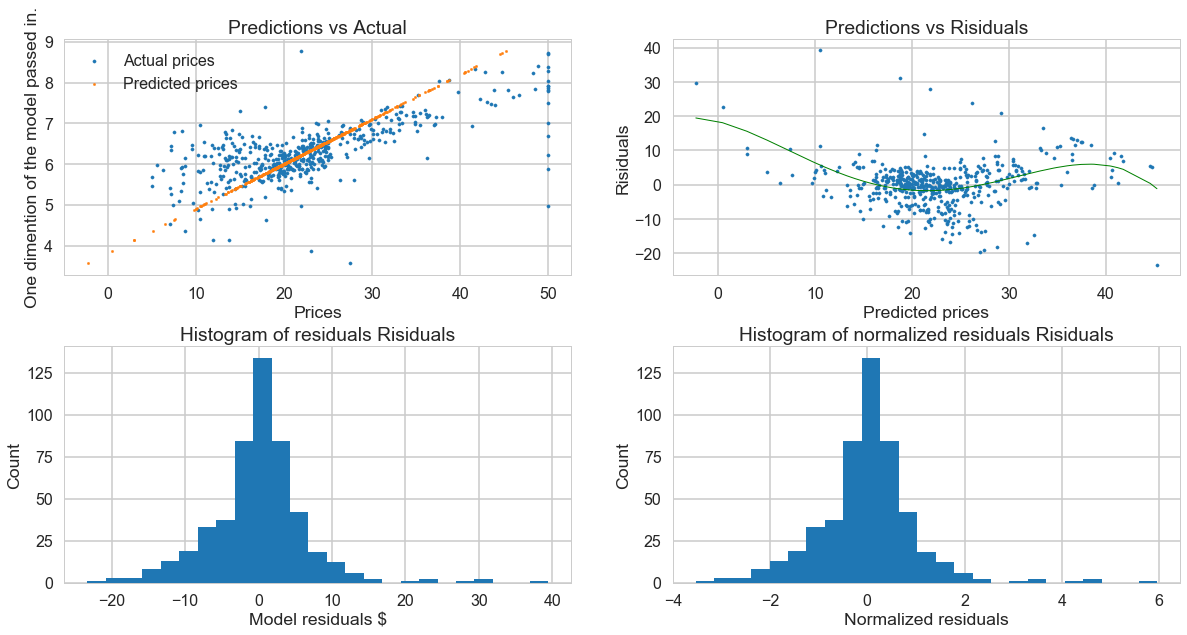

In [129]:
residual_plots(m, bos['RM'], bos['PRICE'], bos['RM'])

Looking at the distribution of the residuals indicates that they are fairly well distributed close to a normal distribution. There are a number of outliers that are probably negatively affecting the model.

- Linearity. There does appear to be some linear-ish relationship
- Constant standard deviation. - the predictions vs actual plot shows some fanning out of prices, the variance in price seems larger for houses with 5 rooms even larger for 6 rooms, the data is very sparse under 5 rooms and with very large room numbers >8 we run into the artificial price cap of \$50k
- Normal distribution for errors. - this assumption seems to be supported by the residual histogram
- Independent errors. - assumed

In [134]:
def resid_qq(m):
    #Construct a qqplot of the residuals
    fig, axes = plt.subplots(1,2, figsize=[20,6])

    ax = axes[0]
    _ = sm.qqplot(m.resid, line='s', ax=ax)
    ax.set_xlabel('Standardized residuals (Sample Quantiles)')
    ax.set_ylabel('Theoretical Quantiles')
    ax.set_title('QQ plot of residuals')

    ax = axes[1]
    pp = sm.ProbPlot(m.resid)
    _ = pp.probplot(ax=ax, line='s')

In [109]:
#import scipy.stats as stats
#import pylab 

# another way to plot the ProbPlot
#_, _ = stats.probplot(m.resid, dist="norm", plot=pylab)   

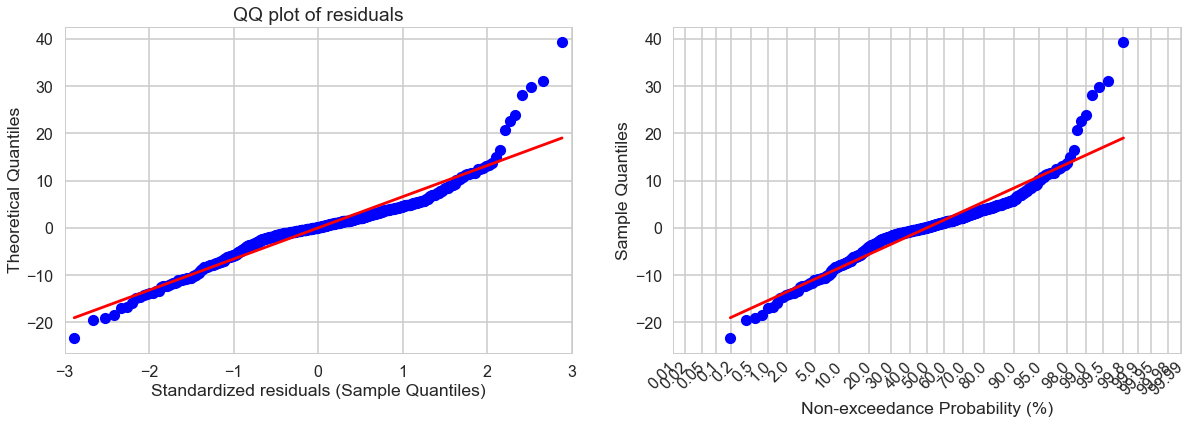

In [135]:
resid_qq(m)

These plots confirm the normal distribution of the residuals at least between $2^{nd}$ and $-2^{nd}$ quantile.

The fitted vs residual plot helps you spot non-linear relationships between the predictor parameters as well as patterns in the residuals. The qq plot helps you confirm that the residuals really are normally distributed.

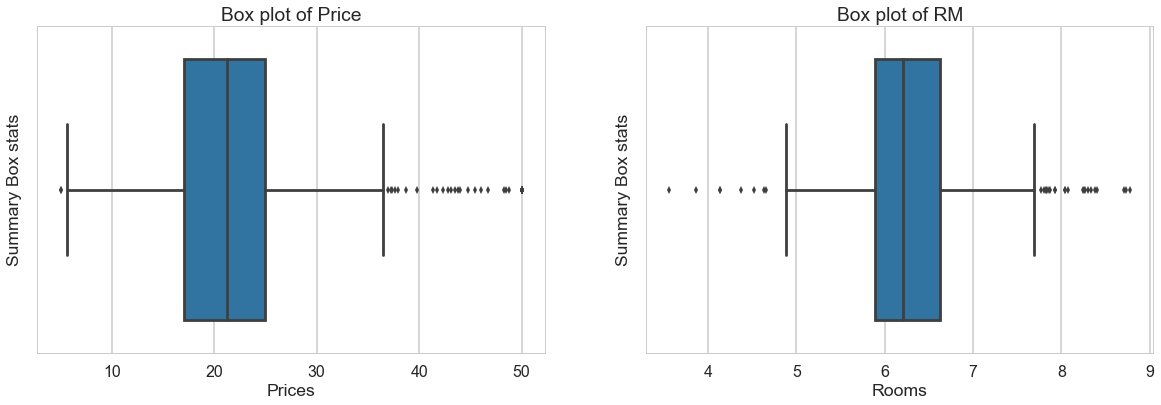

In [112]:
#Construct a box plot to id outliers
fig, axes = plt.subplots(1,2, figsize=[20,6])
#fig.subplots_adjust(hspace=.3)

ax = axes[0]
_ = sns.boxplot(bos.PRICE, ax=ax)
ax.set_xlabel('Prices')
ax.set_ylabel('Summary Box stats')
ax.set_title('Box plot of Price')

ax = axes[1]
_ = sns.boxplot(bos.RM, ax=ax)
ax.set_xlabel('Rooms')
ax.set_ylabel('Summary Box stats')
ax.set_title('Box plot of RM')

plt.show()

By default the seaborn boxplot used above defines an outlier as a point that lies `1.5*IQR` (IQR=interquartile range)

Now we identify these points:

In [113]:
std_rm, std_price = bos.RM.std(), bos.PRICE.std()
mean_rm, mean_price = bos.RM.mean(), bos.PRICE.mean()

print('Standard deviations for Room count and Price are: {:.4f} {:.3f}'.format(std_rm, std_price))
print('Means for Room count and Price are: {:.2f} {:.3f}'.format(mean_rm, mean_price))

Standard deviations for Room count and Price are: 0.7026 9.197
Means for Room count and Price are: 6.28 22.533


In [114]:
def threasholds(std, mean, thresh=1.5):
    return (mean + thresh*std, mean - thresh*std)

In [115]:
rm_thds = threasholds(std_rm, mean_rm)
price_thds = threasholds(std_price, mean_price)
print('Price threasholds [upper, lower]:{:.3f}, {:.3f} '.format(price_thds[0], price_thds[1]))
print('Room count threasholds [upper, lower]:{:.3f}, {:.3f} '.format(rm_thds[0], rm_thds[1]))

Price threasholds [upper, lower]:36.328, 8.737 
Room count threasholds [upper, lower]:7.339, 5.231 


In [119]:
is_outlier = (bos.PRICE > price_thds[0]) | (bos.PRICE < price_thds[1]) |\
                  (bos.RM > rm_thds[0]) | (bos.RM < rm_thds[1])
display(bos.loc[is_outlier, ['PRICE','RM']].head())
print('There are {} outliers when we use the standard 1.5 * IQR as our threashold on both price and rm count'.format(
    len(bos.loc[is_outlier, ['PRICE','RM']])))
print('Index of all outliers: \n{}'.format(bos.loc[is_outlier,:].index))

,PRICE,RM
97,38.7,8.069
98,43.8,7.820
99,33.2,7.416
141,14.4,5.019
144,11.8,4.903


There are 84 outliers when we use the standard 1.5 * IQR as our threashold on both price and rm count
Index of all outliers: 
Int64Index([ 97,  98,  99, 141, 144, 147, 148, 152, 157, 161, 162, 163, 166,
            179, 180, 182, 186, 190, 192, 195, 202, 203, 204, 224, 225, 226,
            228, 231, 232, 233, 237, 253, 256, 257, 261, 262, 264, 267, 268,
            273, 280, 282, 283, 291, 306, 310, 364, 365, 366, 367, 368, 369,
            370, 371, 372, 373, 374, 384, 385, 386, 387, 388, 392, 397, 398,
            399, 400, 401, 403, 404, 405, 406, 412, 413, 414, 415, 416, 419,
            425, 437, 438, 453, 489, 490],
           dtype='int64')


Houses could be particularly expensive due to quirks of the owners personal choices, putting way more design into their house than is justified by its size (aka room count). A few outliers have very low prices, possibly due to particular issues with the house, lack of maintenance, or a particular incident affecting just that property.
Room count could also be an outlier for a number of reasons, maybe a particular house has an un-usual layout due to owner preferences or unique need.

## Cooks distance and influence on a linear regression

[see the Residual & Leverage section](https://data.library.virginia.edu/diagnostic-plots/)

[detailed exploration of different types of problem data](http://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/)

One way to think about whether or not the results you have were driven by a given data point is to calculate how far the predicted values for your data would move if your model were fit without the data point in question. This calculated total distance is called Cook's distance. Fortunately, you don't have to rerun your regression model N times to find out how far the predicted values will move, Cook's D is a function of the leverage and standardized residual associated with each data point.

In [137]:
def inf_and_leverage(mod):
    fig, axes = plt.subplots(1,1, figsize=[20,6])

    ax = axes
    influence = mod.get_influence()
    #c is the distance and p is p-value
    (c, p) = influence.cooks_distance
    ax.stem(np.arange(len(c)), c, markerfmt=",")
    ax.set_xlabel('Index of observation in dataframe')
    ax.set_ylabel('Cooks distance')
    ax.set_title('Observations and their Cooks distance (aka influence on the regression)')
    plt.show()

    fig, axes = plt.subplots(1,2, figsize=[20,6])
    ax = axes[0]
    ax = sm.graphics.plot_leverage_resid2(mod, alpha =0.05, ax=ax)

    ax = axes[1]
    ax = sm.graphics.influence_plot(mod, alpha =0.05, ax=ax, criterion="cooks")

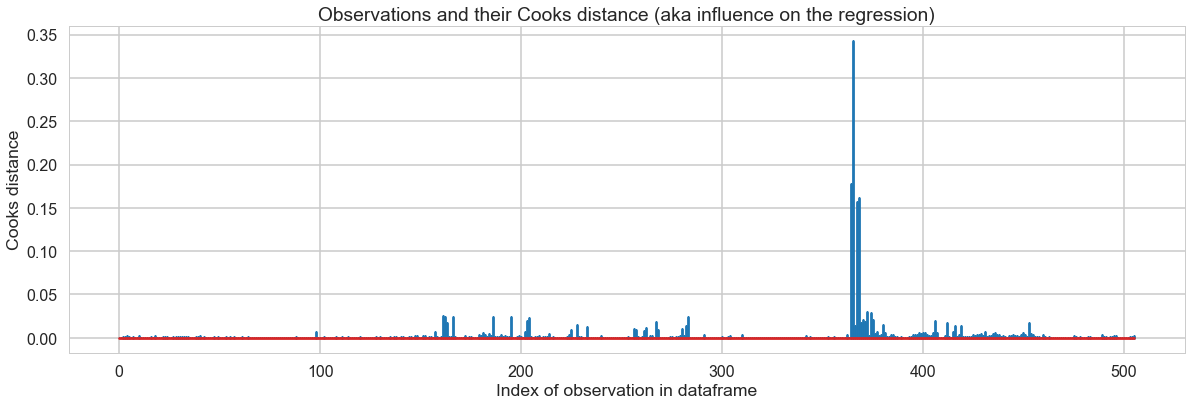

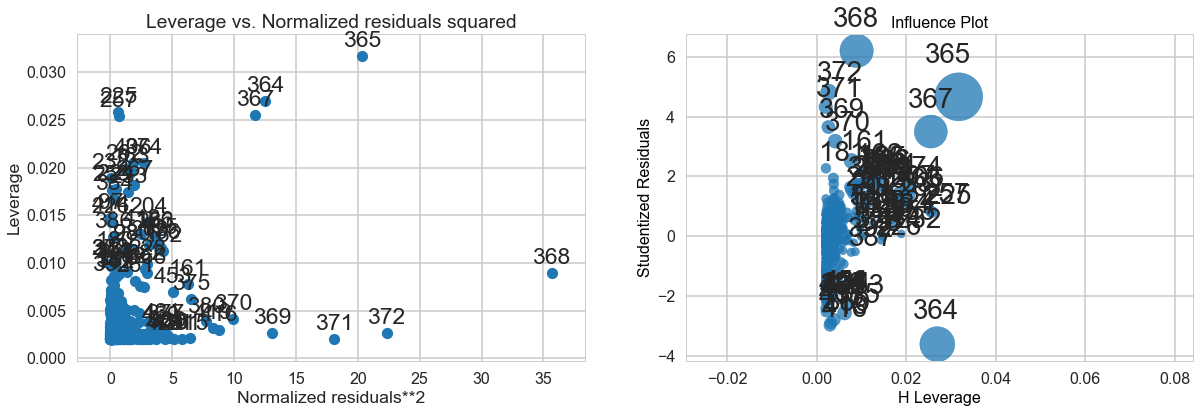

In [138]:
inf_and_leverage(m)

Although the labeled index numbers look ugly (couldn't find the right format to make matplotlib use smaller text!) that's because there are so many of them 84, if you compare the index numbers to the list of outliers we found manually in our data you will see they match. Not all outliers are also high leverage points as an outlier may not be at the extreme of the data range, they could just be at the extremes of the data.

## Excluding outliers and re-running the model

In [132]:
print('Number of non outlying points: {}'.format(len(bos[~is_outlier])))
print('Number of outliers: {}'.format(len(bos[is_outlier])))

Number of non outlying points: 422
Number of outliers: 84


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     232.9
Date:                Thu, 30 Aug 2018   Prob (F-statistic):           3.72e-42
Time:                        16:15:47   Log-Likelihood:                -1245.9
No. Observations:                 422   AIC:                             2496.
Df Residuals:                     420   BIC:                             2504.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.6545      3.213     -8.607      0.0

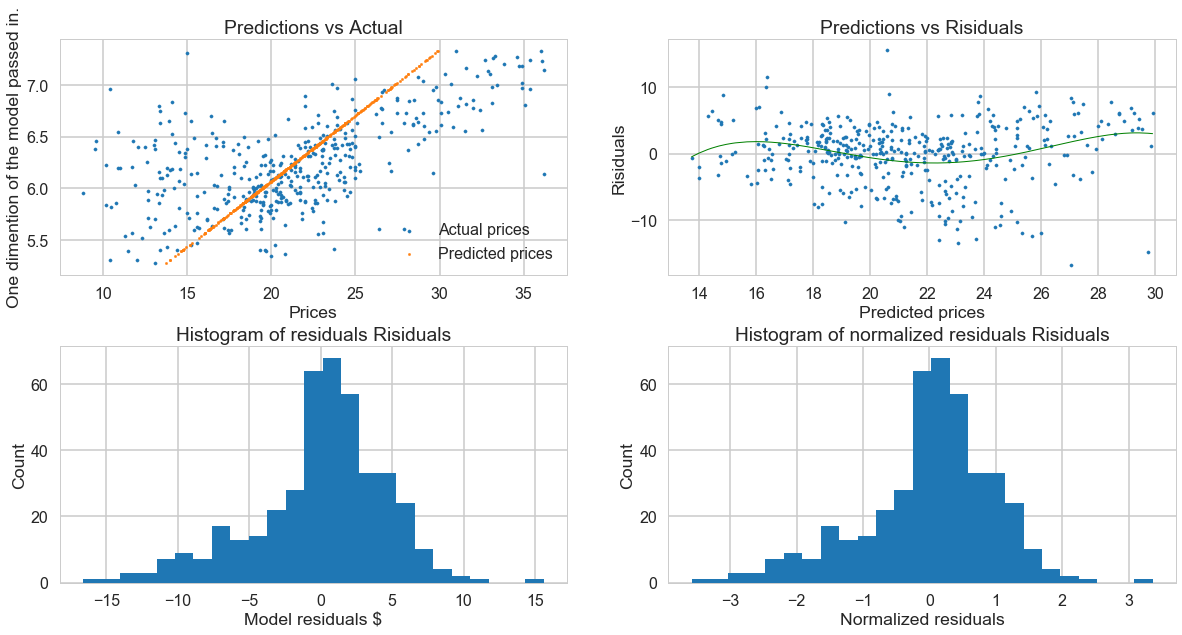

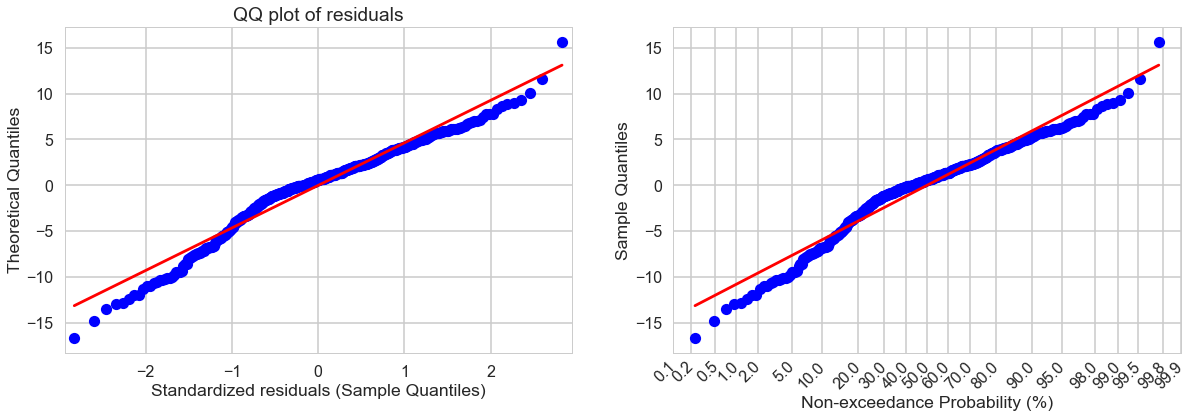

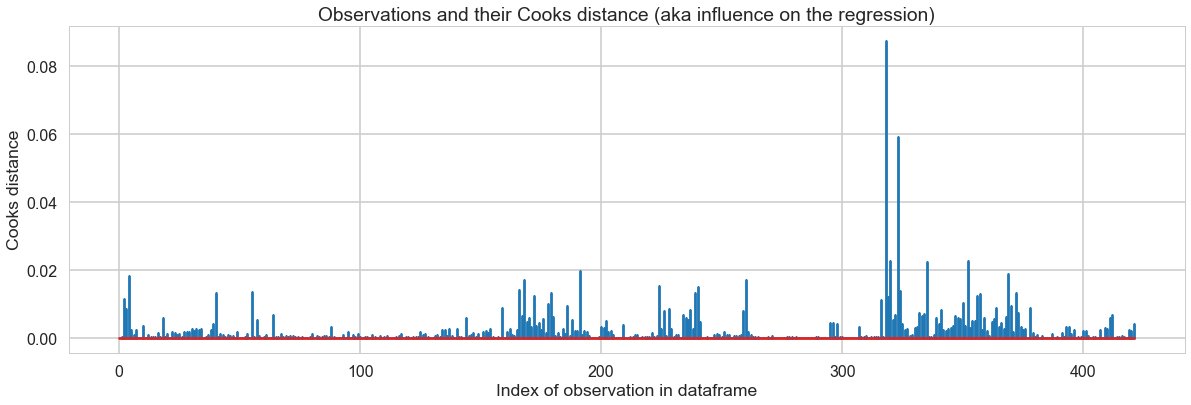

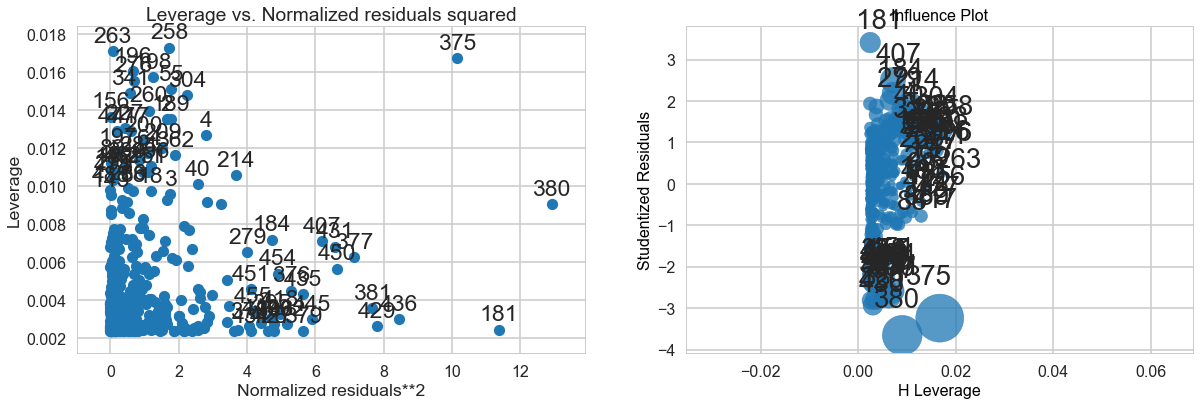

In [139]:
m2 = ols('PRICE ~ RM', bos[~is_outlier]).fit()
print(m2.summary())

residual_plots(m2, bos[~is_outlier], bos.loc[~is_outlier,['PRICE']], bos.loc[~is_outlier,['RM']])
resid_qq(m2)
inf_and_leverage(m2)

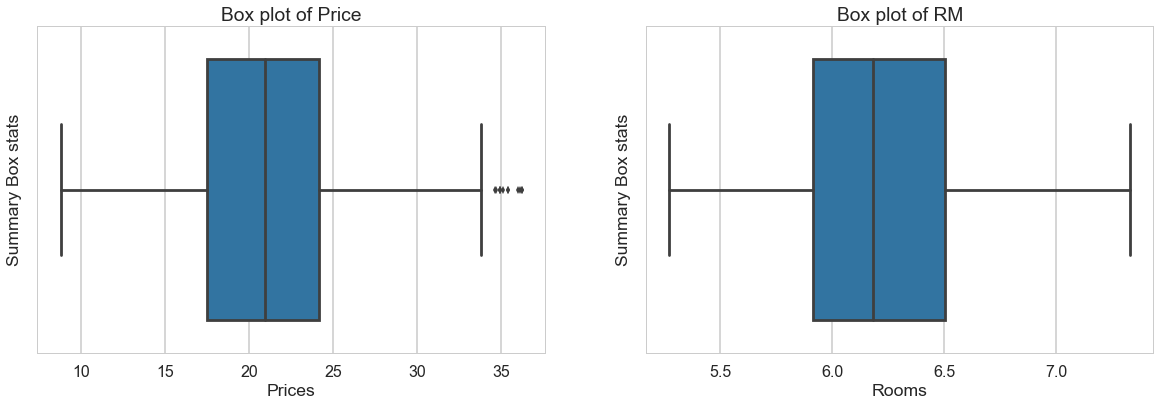

In [141]:
#Construct a box plot to id outliers
fig, axes = plt.subplots(1,2, figsize=[20,6])
#fig.subplots_adjust(hspace=.3)

ax = axes[0]
_ = sns.boxplot(bos[~is_outlier].PRICE, ax=ax)
ax.set_xlabel('Prices')
ax.set_ylabel('Summary Box stats')
ax.set_title('Box plot of Price')

ax = axes[1]
_ = sns.boxplot(bos[~is_outlier].RM, ax=ax)
ax.set_xlabel('Rooms')
ax.set_ylabel('Summary Box stats')
ax.set_title('Box plot of RM')

plt.show()

Interesting we now have another set of outliers identified!

Its also disturbing that the model actually seems to fit worse than before:
 - $R^2$ went from $48\%$ down to $36\%$ (this is bad)
 - AIC went from 3350 down to 2496 (this is good)
 - F-stat went from to 471.8 to 232 (this is bad)
 
 So I conclude from this that excluding all outliers in both price and rm was too exteme - or I used a too extreme threshold for this exclusion. Re-running the model with a less extreme set of excluded points. This time I will only exclude points that seem extreme on the leverage and Influence plots

In [145]:
is_out2 = bos.index.isin([369,367,364,365,371,372,368,])
bos[is_out2]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
364,3.47428,0.0,18.1,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     741.6
Date:                Thu, 30 Aug 2018   Prob (F-statistic):          1.31e-100
Time:                        16:34:49   Log-Likelihood:                -1571.8
No. Observations:                 499   AIC:                             3148.
Df Residuals:                     497   BIC:                             3156.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -41.9479      2.373    -17.678      0.0

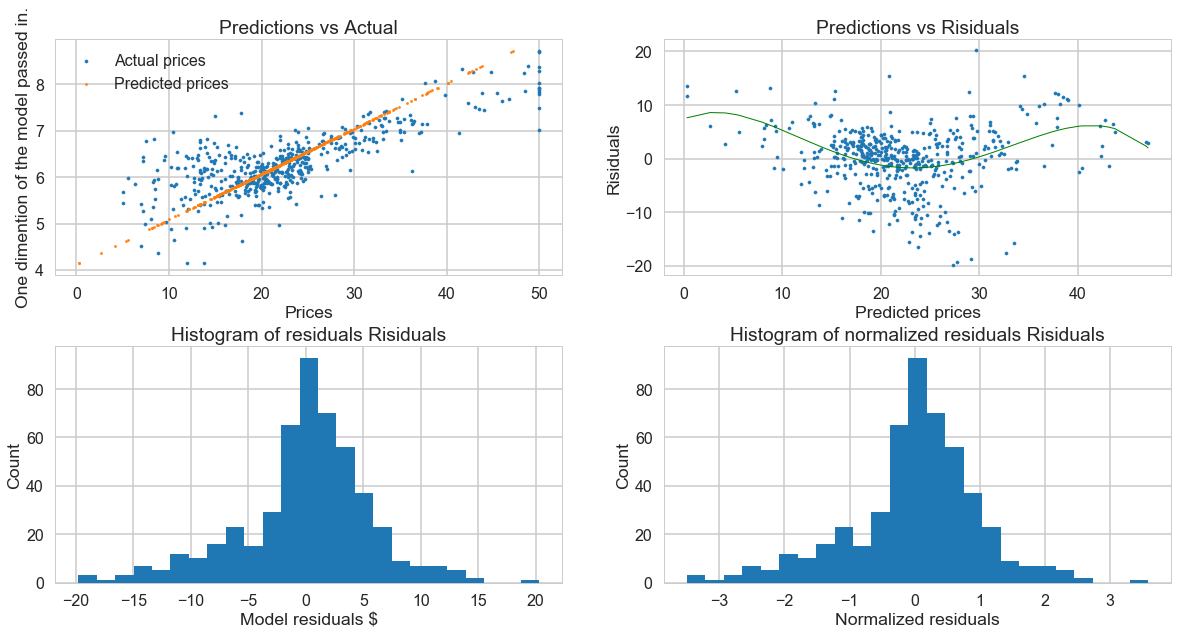

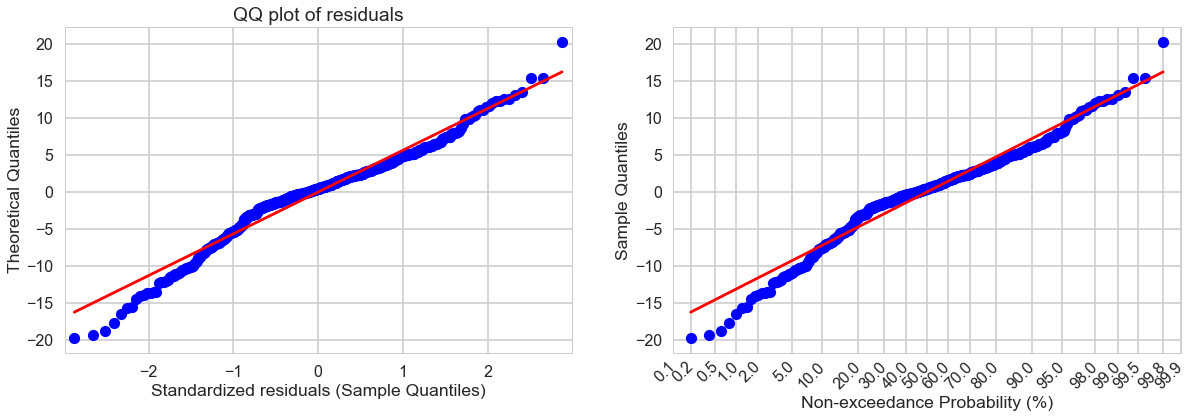

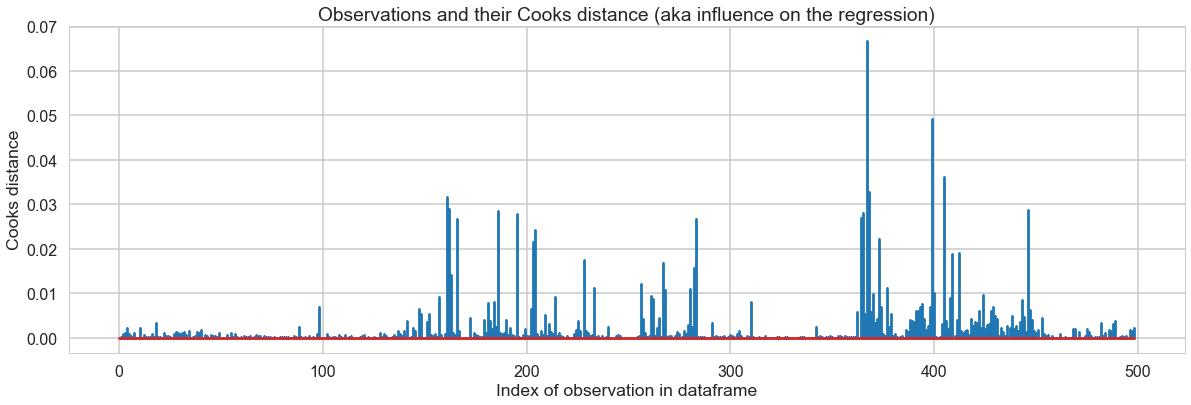

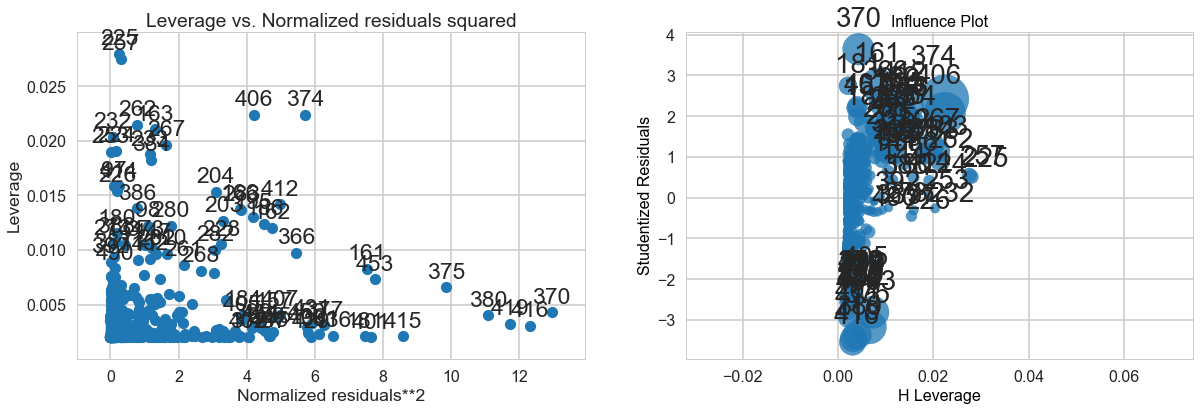

In [147]:
m3 = ols('PRICE ~ RM', bos[~is_out2]).fit()
print(m3.summary())

residual_plots(m3, bos[~is_out2], bos.loc[~is_out2,['PRICE']], bos.loc[~is_out2,['RM']])
resid_qq(m3)
inf_and_leverage(m3)

Thats better the model definately fits better than before this time:
 - $R^2$ went from $48\%$ up to $60\%$ (this is good)
 - AIC went from 3350 down to 3148 (this is good)
 - F-stat went from to 471.8 to 741.6 (this is good)

In [166]:
influence = m3.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
pd.DataFrame({'cooks_D':c})
df = bos.loc[~is_out2,:].copy()
df['cd'] = c
df.sort_values('cd', ascending=False).head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,cd
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8,0.066684
406,20.71620,0.0,18.10,0.0,0.659,4.138,100.0,1.1781,24.0,666.0,20.2,370.22,23.34,11.9,0.049232
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9,0.036140
375,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44,15.0,0.032679
161,1.46336,0.0,19.58,0.0,0.605,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0,0.031559
162,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0,0.029010
453,8.24809,0.0,18.10,0.0,0.713,7.393,99.3,2.4527,24.0,666.0,20.2,375.87,16.74,17.8,0.028737
186,0.05602,0.0,2.46,0.0,0.488,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0,0.028544
370,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0,0.027962
195,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0,0.027766


Removing the last two high leverage (large cooks distance) points

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     759.1
Date:                Thu, 30 Aug 2018   Prob (F-statistic):          5.51e-102
Time:                        16:49:23   Log-Likelihood:                -1561.3
No. Observations:                 497   AIC:                             3127.
Df Residuals:                     495   BIC:                             3135.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -43.5650      2.405    -18.112      0.0

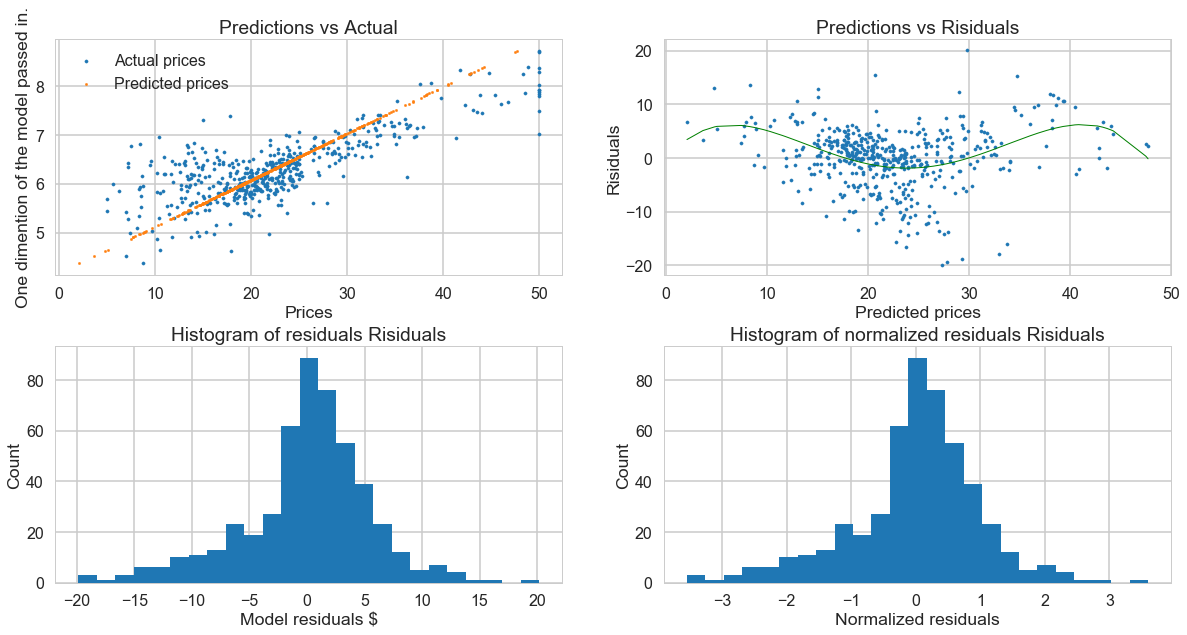

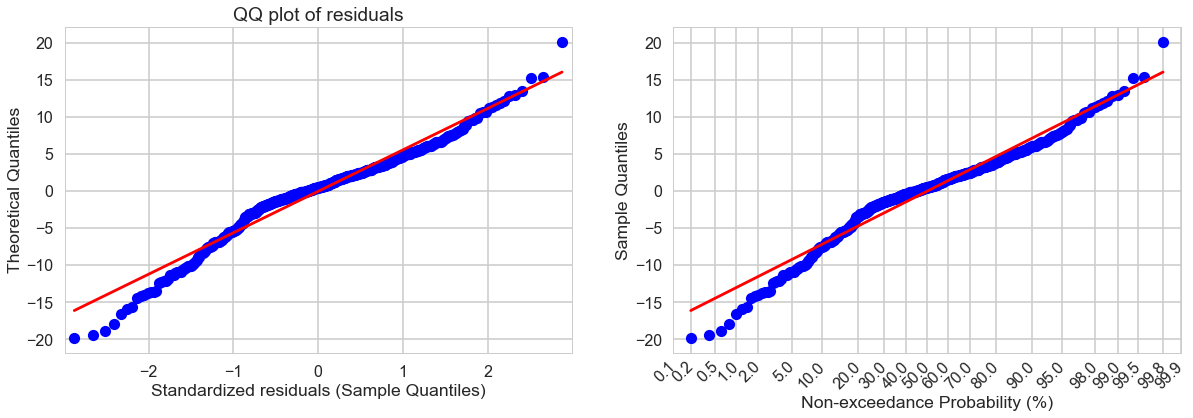

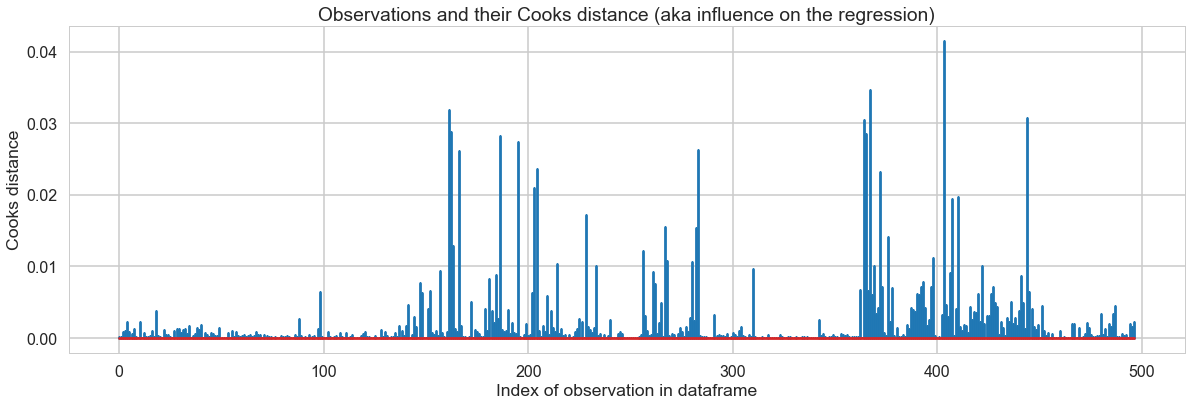

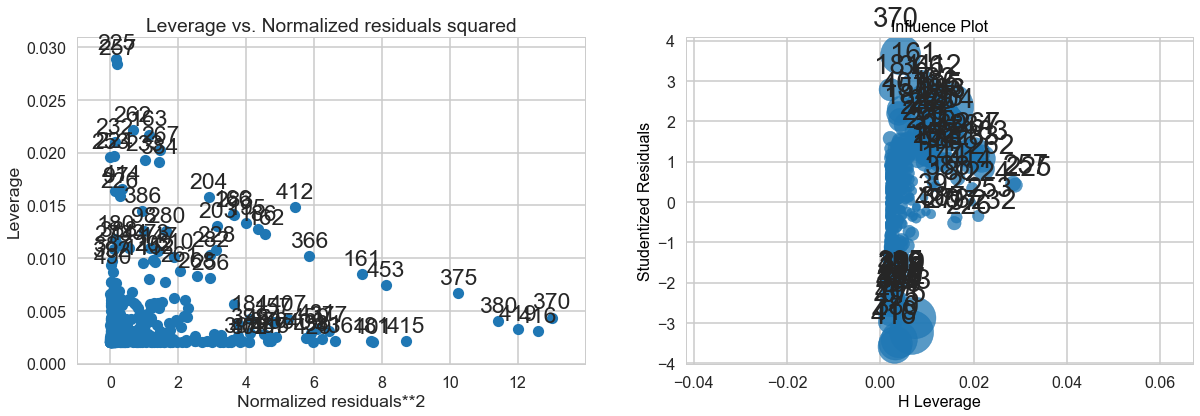

In [162]:
is_out3 = bos.index.isin([369,367,364,365,371,372,368,374,406])
bos[is_out3]

m4 = ols('PRICE ~ RM', bos[~is_out3]).fit()
print(m4.summary())

residual_plots(m4, bos[~is_out3], bos.loc[~is_out3,['PRICE']], bos.loc[~is_out3,['RM']])
resid_qq(m4)
inf_and_leverage(m4)

Thats better the model definately fits better than before this time:
 - $R^2$ went from $48\%$ up to $60\%$ (this is good) and now to $61\%$
 - AIC went from 3350 down to 3148 (this is good) and now down to 3127
 - F-stat went from to 471.8 to 741.6 (this is good) and now up to 759